In [1]:
import pandas as pd
import statsmodels.tsa.api as smt       # to perform various time-series analysis functions
import pickle

In [2]:
abspath = 'D:/OneDrive/Data/Brooks4e/'
data = pd.read_excel(abspath + 'UKHP.xls', index_col=0)
data['dhp'] = data['Average House Price'].transform(lambda x : (x - x.shift(1))/x.shift(1)*100)
data = data.dropna()
data.head()

,Average House Price,dhp
Month,,
1991-02-01,53496.798746,0.838950
1991-03-01,52892.861606,-1.128922
1991-04-01,53677.435270,1.483326
1991-05-01,54385.726747,1.319533
1991-06-01,55107.375085,1.326908


In [3]:
# Save the data by pickle module
with open(abspath + '/Work/UKHP.pickle', 'wb') as handle:
    pickle.dump(data, handle)

In [5]:
with open(abspath + '/Work/UKHP.pickle', 'rb') as handle:
    data2 = pickle.load(handle)
    
data2.head()

,Average House Price,dhp
Month,,
1991-02-01,53496.798746,0.838950
1991-03-01,52892.861606,-1.128922
1991-04-01,53677.435270,1.483326
1991-05-01,54385.726747,1.319533
1991-06-01,55107.375085,1.326908


In [6]:
data2.describe()

,Average House Price,dhp
count,326.000000,326.000000
mean,124880.143248,0.431520
std,56333.553733,1.118673
min,49601.664241,-3.404716
25%,61834.572174,-0.255697
50%,151234.985418,0.448334
75%,169277.878163,1.152205
max,211755.925562,3.802188


In [7]:
data.describe()

,Average House Price,dhp
count,326.000000,326.000000
mean,124880.143248,0.431520
std,56333.553733,1.118673
min,49601.664241,-3.404716
25%,61834.572174,-0.255697
50%,151234.985418,0.448334
75%,169277.878163,1.152205
max,211755.925562,3.802188


In [8]:
acf,q,pval = smt.acf(data['dhp'],nlags=12,qstat=True)
pacf = smt.pacf(data['dhp'],nlags=12)
correlogram = pd.DataFrame({'acf': acf[1:],
                           'pacf': pacf[1:],
                           'Q': q,
                           'p-val': pval})
correlogram

C:\Users\andyw\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


,acf,pacf,Q,p-val
0,0.357530,0.358630,42.056495,8.867420e-11
1,0.418110,0.335185,99.749962,2.185601e-22
2,0.231136,0.016514,117.435756,2.751958e-25
3,0.182406,-0.019309,128.484575,8.212175e-27
4,0.126357,0.005922,133.803012,3.709054e-27
5,0.130596,0.055526,139.502089,1.276524e-27
6,0.060789,-0.030376,140.740725,3.555650e-27
7,0.096431,0.036471,143.867517,3.719180e-27
8,0.160491,0.148973,152.555817,2.604935e-28
9,0.136606,0.040527,158.870433,5.542515e-29


In [9]:
# Source from:
# https://www.google.com/search?q=how+to+plot+acf+and+pacf+in+python&sxsrf=AOaemvKX-eBYpQGMbqFOCcdPiZMsNMBBeA%3A1639491535067&source=hp&ei=z6e4YYqtAZeM-Abiyp34CA&iflsig=ALs-wAMAAAAAYbi138y9MLU4LbwbTM3MUTlyfDcqy3nt&oq=how+to+plot+acf+and+pacf&gs_lcp=Cgdnd3Mtd2l6EAMYADIKCAAQgAQQhwIQFDIFCAAQgAQyBQgAEIAEMgYIABAWEB4yBggAEBYQHjIGCAAQFhAeOgQIIxAnOgQIABBDOg4ILhCABBCxAxDHARCjAjoLCAAQgAQQsQMQgwE6CwguELEDEMcBENEDOg4ILhCxAxCDARDHARDRAzoICAAQsQMQgwE6BAguEEM6CAguEIAEELEDOgsILhCxAxDHARCvAToICAAQgAQQsQM6BQgAELEDOgUILhCABFAAWIFSYKxgaABwAHgAgAFYiAGkDJIBAjI0mAEAoAEB&sclient=gws-wiz#kpvalbx=_3ae4YfKnE8jw-QaQ9ZD4Dw24

In [10]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

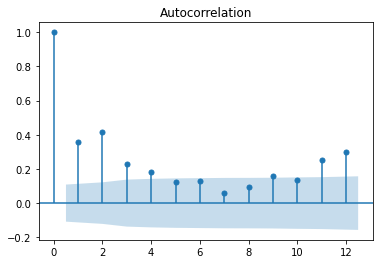

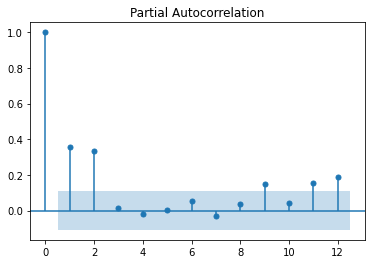

In [11]:
sm.graphics.tsa.plot_acf(data.dhp.squeeze(), lags=12)
sm.graphics.tsa.plot_pacf(data.dhp.squeeze(), lags=12)
plt.show()